In [18]:
import pandas as pd
import numpy as np

In [19]:
#Load Dataset

use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./testdata.csv', usecols=use_cols)
print(data.shape)
data.head(8)

(891, 6)


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,other,35.0,1,53.1000
4,0,3,NaN,35.0,0,8.0500
5,0,3,male,NaN,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750


In [20]:
# Check for missing data

for colname in use_cols:
    print('Column name - {}, Null values found - {}, Count - {}'.format(colname,data[colname].isnull().values.any(),data[colname].isnull().sum()))

Column name - Pclass, Null values found - False, Count - 0
Column name - Sex, Null values found - True, Count - 1
Column name - Age, Null values found - True, Count - 177
Column name - Fare, Null values found - False, Count - 0
Column name - SibSp, Null values found - False, Count - 0
Column name - Survived, Null values found - False, Count - 0


In [21]:
# Drop element
newdf = data.dropna()
print(newdf.shape)
newdf.head(8)

(713, 6)


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,other,35.0,1,53.1000
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


In [22]:
# Replace Numerical Imputation
data['Age'].fillna(data['Age'].mean(), inplace=True)
print(data.head(8))

   Survived  Pclass     Sex        Age  SibSp     Fare
0         0       3    male  22.000000      1   7.2500
1         1       1  female  38.000000      1  71.2833
2         1       3  female  26.000000      0   7.9250
3         1       1   other  35.000000      1  53.1000
4         0       3     NaN  35.000000      0   8.0500
5         0       3    male  29.699118      0   8.4583
6         0       1    male  54.000000      0  51.8625
7         0       3    male   2.000000      3  21.0750


In [23]:
# Replace Categorical Imputation
data['Sex'].fillna(data['Sex'].value_counts().idxmax(), inplace=True)
print(data.head(8))

   Survived  Pclass     Sex        Age  SibSp     Fare
0         0       3    male  22.000000      1   7.2500
1         1       1  female  38.000000      1  71.2833
2         1       3  female  26.000000      0   7.9250
3         1       1   other  35.000000      1  53.1000
4         0       3    male  35.000000      0   8.0500
5         0       3    male  29.699118      0   8.4583
6         0       1    male  54.000000      0  51.8625
7         0       3    male   2.000000      3  21.0750


In [24]:
# Handling Outliers
factor = 1
upper_lim = data['Age'].mean() + data['Age'].std() * factor
lower_lim = data['Age'].mean() - data['Age'].std() * factor
print(upper_lim,lower_lim)
data = data[(data['Age'] < upper_lim) & (data['Age'] > lower_lim)]
print(data.head(8))

42.7011328730617 16.697102421055938
    Survived  Pclass     Sex        Age  SibSp     Fare
0          0       3    male  22.000000      1   7.2500
1          1       1  female  38.000000      1  71.2833
2          1       3  female  26.000000      0   7.9250
3          1       1   other  35.000000      1  53.1000
4          0       3    male  35.000000      0   8.0500
5          0       3    male  29.699118      0   8.4583
8          1       3  female  27.000000      0  11.1333
12         0       3    male  20.000000      0   8.0500


In [25]:
# Binning
data['age_bin'] = pd.cut(data['Age'], bins=[0,21,50,100], labels=["Child", "Adult", "Old"])
print(data.head(8))

    Survived  Pclass     Sex        Age  SibSp     Fare age_bin
0          0       3    male  22.000000      1   7.2500   Adult
1          1       1  female  38.000000      1  71.2833   Adult
2          1       3  female  26.000000      0   7.9250   Adult
3          1       1   other  35.000000      1  53.1000   Adult
4          0       3    male  35.000000      0   8.0500   Adult
5          0       3    male  29.699118      0   8.4583   Adult
8          1       3  female  27.000000      0  11.1333   Adult
12         0       3    male  20.000000      0   8.0500   Child


In [26]:
# Log Transform
data['log_fare'] = np.log(data['Fare']+1)
print(data.head(8))

    Survived  Pclass     Sex        Age  SibSp     Fare age_bin  log_fare
0          0       3    male  22.000000      1   7.2500   Adult  2.110213
1          1       1  female  38.000000      1  71.2833   Adult  4.280593
2          1       3  female  26.000000      0   7.9250   Adult  2.188856
3          1       1   other  35.000000      1  53.1000   Adult  3.990834
4          0       3    male  35.000000      0   8.0500   Adult  2.202765
5          0       3    male  29.699118      0   8.4583   Adult  2.246893
8          1       3  female  27.000000      0  11.1333   Adult  2.495954
12         0       3    male  20.000000      0   8.0500   Child  2.202765


In [27]:
#One-Hot Encoding
encoded_columns = pd.get_dummies(data['Sex'])
data = data.join(encoded_columns).drop('Sex', axis=1)
print(data.head(8))

    Survived  Pclass        Age  SibSp     Fare age_bin  log_fare  female  \
0          0       3  22.000000      1   7.2500   Adult  2.110213       0   
1          1       1  38.000000      1  71.2833   Adult  4.280593       1   
2          1       3  26.000000      0   7.9250   Adult  2.188856       1   
3          1       1  35.000000      1  53.1000   Adult  3.990834       0   
4          0       3  35.000000      0   8.0500   Adult  2.202765       0   
5          0       3  29.699118      0   8.4583   Adult  2.246893       0   
8          1       3  27.000000      0  11.1333   Adult  2.495954       1   
12         0       3  20.000000      0   8.0500   Child  2.202765       0   

    male  other  
0      1      0  
1      0      0  
2      0      0  
3      0      1  
4      1      0  
5      1      0  
8      0      0  
12     1      0  


In [28]:
# Scaling
data['fare_normalized'] = (data['Fare'] - data['Fare'].min()) / (data['Fare'].max() - data['Fare'].min())
data['fare_standardized'] = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
print(data.head(8))

    Survived  Pclass        Age  SibSp     Fare age_bin  log_fare  female  \
0          0       3  22.000000      1   7.2500   Adult  2.110213       0   
1          1       1  38.000000      1  71.2833   Adult  4.280593       1   
2          1       3  26.000000      0   7.9250   Adult  2.188856       1   
3          1       1  35.000000      1  53.1000   Adult  3.990834       0   
4          0       3  35.000000      0   8.0500   Adult  2.202765       0   
5          0       3  29.699118      0   8.4583   Adult  2.246893       0   
8          1       3  27.000000      0  11.1333   Adult  2.495954       1   
12         0       3  20.000000      0   8.0500   Child  2.202765       0   

    male  other  fare_normalized  fare_standardized  
0      1      0         0.014151          -0.436689  
1      0      0         0.139136           0.785593  
2      0      0         0.015469          -0.423804  
3      0      1         0.103644           0.438506  
4      1      0         0.015713    

In [29]:
# Feature Selection - Correlation
feat_cols = ['Pclass', 'Age', 'SibSp', 'log_fare','Fare', 'fare_normalized', 'fare_standardized']
X = data[feat_cols]
Y = data['Survived']
X.head(10)

,Pclass,Age,SibSp,log_fare,Fare,fare_normalized,fare_standardized
0,3,22.000000,1,2.110213,7.2500,0.014151,-0.436689
1,1,38.000000,1,4.280593,71.2833,0.139136,0.785593
2,3,26.000000,0,2.188856,7.9250,0.015469,-0.423804
3,1,35.000000,1,3.990834,53.1000,0.103644,0.438506
4,3,35.000000,0,2.202765,8.0500,0.015713,-0.421418
5,3,29.699118,0,2.246893,8.4583,0.016510,-0.413625
8,3,27.000000,0,2.495954,11.1333,0.021731,-0.362564
12,3,20.000000,0,2.202765,8.0500,0.015713,-0.421418
13,3,39.000000,1,3.474293,31.2750,0.061045,0.021906
17,2,29.699118,0,2.639057,13.0000,0.025374,-0.326932


In [32]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)), corr_features )

correlated features:  2 {'fare_standardized', 'fare_normalized'}


<AxesSubplot:>

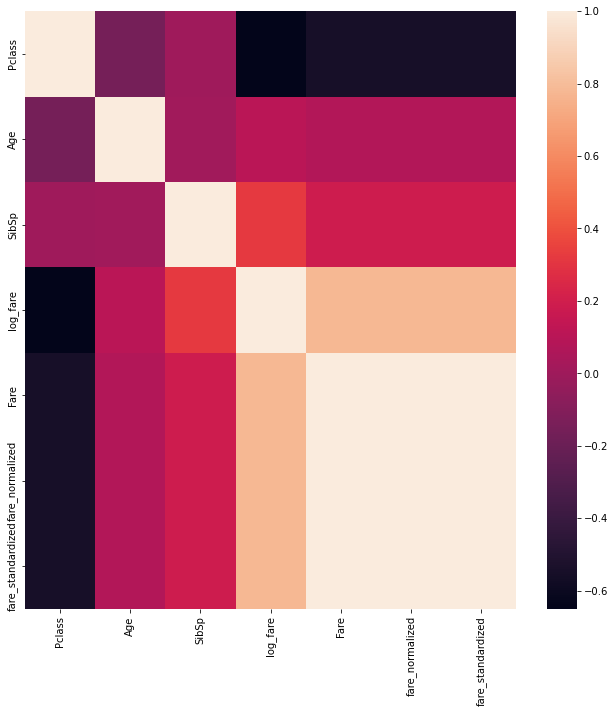

In [33]:
# Visualize Correlated Features
import seaborn as sns
import matplotlib.pyplot as plt
corr = X.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)